# 💸 Day 9 – Loan Default Prediction

 📌 Objectives:
* Predict if a borrower will default on a loan.
* Handle imbalanced classes.
* Perform feature engineering.
* Evaluate model using ROC-AUC, confusion matrix, etc.

In [1]:
# ✅ Import all necessary libraries for data handling, visualization, preprocessing, modeling, and evaluation

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [2]:
# ✅ Load loan default dataset downloaded from Kaggle
df = pd.read_csv('loan_Default.csv')

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
# ✅ Explore the dataset structure and look for issues

# Overview of column types, non-null counts, and memory usage
df.info()

# Count missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [4]:
# Descriptive statistics for numerical columns
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [5]:
# Check distribution of the target variable
print("\nTarget Class Distribution (Default):")
print(df['Default'].value_counts())


Target Class Distribution (Default):
Default
0    225694
1     29653
Name: count, dtype: int64


In [6]:
# ✅ Step 4: Data Cleaning & Preprocessing

# Drop identifier column (not useful for prediction)
df.drop(columns=['LoanID'], inplace=True)

# Check again for missing values (just in case)
print("Missing values after dropping LoanID:")
print(df.isnull().sum())

categorical_cols = df.select_dtypes(include='object').columns
print("\n",categorical_cols)
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['Default'])
y = df['Default']

# Display first few rows of processed features
print("\nProcessed feature sample:")
print(X.head())


Missing values after dropping LoanID:
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

 Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

Processed feature sample:
   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8   

In [7]:
# ✅ Split data into training and test sets (80% train, 20% test)
# Stratify by target to preserve class distribution (Important in Imbalanced Classification Problem)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Train set size: 204277 samples
Test set size: 51070 samples


In [8]:
# Initialize Random Forest with class_weight='balanced' to handle class imbalance
model = RandomForestClassifier(class_weight='balanced', random_state=42) 
# Works well for many imbalanced classification problems, especially when the imbalance isn't extremely severe.

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [9]:
# Predict class labels for test data
y_pred = model.predict(X_test)

# Predict probabilities for positive class (Default=1) to calculate ROC-AUC
y_proba = model.predict_proba(X_test)[:, 1]

print(y_proba)

[0.03 0.04 0.13 ... 0.09 0.04 0.13]


In [10]:
# Print classification report (precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.64      0.03      0.05      5931

    accuracy                           0.89     51070
   macro avg       0.76      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



## Model Performance Summary

- **Class 0 (No Default):**
  - Precision: 89%
  - Recall: 100%
  - F1-score: 94%

- **Class 1 (Default):**
  - Precision: 64%
  - Recall: 3%
  - F1-score: 5%

- **Overall Accuracy:** 89%

**Note:**  
The model performs well on non-default loans but struggles to identify most defaults (only 3% recall), which is critical for risk management.  
Further improvements like adjusting thresholds or using oversampling methods are needed.


In [11]:
# Show confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")


Confusion Matrix:
 [[45047    92]
 [ 5765   166]]
ROC AUC Score: 0.7342


## Interpretation:
* True Negatives (TN) = 45,047:
These are loans correctly predicted as non-default. Good!

* False Positives (FP) = 92:
These are loans predicted as default, but they actually did not default.
This is a Type I error (false alarm).

* False Negatives (FN) = 5,765:
These are loans predicted as non-default, but they actually defaulted.
This is a Type II error (missed default).
This is more critical because the bank loses money here.

* True Positives (TP) = 166:
Loans correctly predicted as default.

## Key takeaway:
The model is very good at identifying non-defaults (high TN), but it misses a lot of actual defaults (high FN).

This suggests the model’s recall for the default class is low, which might be a problem if catching defaults is important.

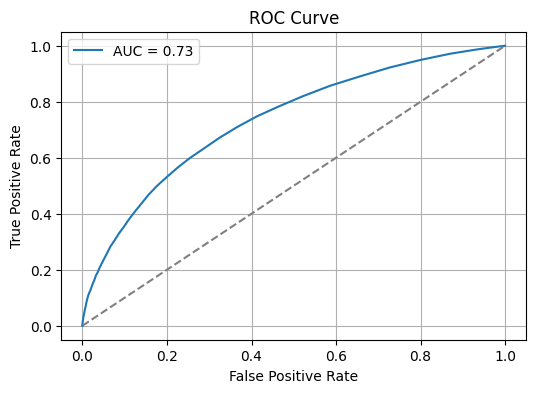

In [16]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from imblearn.over_sampling import SMOTE # used to balance imbalanced datasets by generating synthetic samples for the minority class.

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data only
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Original training set size: {X_train.shape[0]}")
print(f"SMOTE training set size: {X_train_smote.shape[0]}")

# Train the model on the balanced data
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)


d:\Programming\Machine-Learning\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Original training set size: 204277
SMOTE training set size: 361110


RandomForestClassifier(random_state=42)

Classification Report (SMOTE Model):
               precision    recall  f1-score   support

           0       0.90      0.91      0.90     45139
           1       0.25      0.23      0.24      5931

    accuracy                           0.83     51070
   macro avg       0.57      0.57      0.57     51070
weighted avg       0.82      0.83      0.83     51070

Confusion Matrix (SMOTE Model):
 [[40943  4196]
 [ 4555  1376]]
ROC AUC Score (SMOTE Model): 0.6974


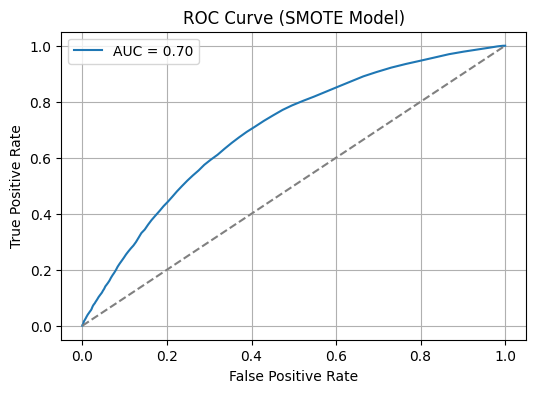

In [15]:
# Predict on the original test set using the SMOTE-trained model
y_pred_smote = model_smote.predict(X_test)
y_proba_smote = model_smote.predict_proba(X_test)[:, 1]

# Print classification report
print("Classification Report (SMOTE Model):\n", classification_report(y_test, y_pred_smote))

# Print confusion matrix
print("Confusion Matrix (SMOTE Model):\n", confusion_matrix(y_test, y_pred_smote))

# Calculate and print ROC AUC score
roc_auc_smote = roc_auc_score(y_test, y_proba_smote)
print(f"ROC AUC Score (SMOTE Model): {roc_auc_smote:.4f}")

# Plot ROC Curve for SMOTE Model
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_proba_smote)
plt.figure(figsize=(6, 4))
plt.plot(fpr_smote, tpr_smote, label=f"AUC = {roc_auc_smote:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SMOTE Model)")
plt.legend()
plt.grid(True)
plt.show()


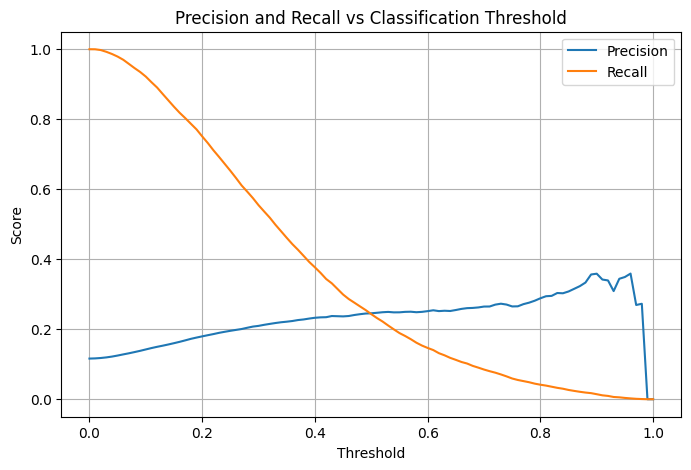

In [17]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for the positive class
y_scores = model_smote.predict_proba(X_test)[:, 1]

# Compute precision, recall, thresholds for various cutoffs
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

import matplotlib.pyplot as plt

# Plot precision and recall vs threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Classification Threshold")
plt.legend()
plt.grid()
plt.show()

In [31]:
thresholds_to_test = [0.1, 0.2, 0.3, 0.4, 0.5]

for thresh in thresholds_to_test:
    y_pred_thresh = (y_scores >= thresh).astype(int)
    print(f"\nThreshold: {thresh}")
    print(classification_report(y_test, y_pred_thresh, digits=3))
    cm = confusion_matrix(y_test, y_pred_thresh)
    print("Confusion Matrix:")
    print(cm)



Threshold: 0.1
              precision    recall  f1-score   support

           0      0.963     0.270     0.421     45139
           1      0.142     0.922     0.246      5931

    accuracy                          0.345     51070
   macro avg      0.553     0.596     0.334     51070
weighted avg      0.868     0.345     0.401     51070

Confusion Matrix:
[[12172 32967]
 [  464  5467]]

Threshold: 0.2
              precision    recall  f1-score   support

           0      0.944     0.549     0.694     45139
           1      0.180     0.751     0.290      5931

    accuracy                          0.573     51070
   macro avg      0.562     0.650     0.492     51070
weighted avg      0.855     0.573     0.647     51070

Confusion Matrix:
[[24794 20345]
 [ 1477  4454]]

Threshold: 0.3
              precision    recall  f1-score   support

           0      0.925     0.725     0.813     45139
           1      0.210     0.554     0.304      5931

    accuracy                        

## What this means:
* Lower thresholds (0.1 - 0.3) increase recall, catching more defaults but with many false alarms.

* Higher thresholds (0.4 - 0.5) increase precision but miss many defaults (low recall).

* Threshold around 0.3 or 0.2 offers a reasonable balance — recall above 50% and precision around 20%, with acceptable accuracy.

## Recommendation:
* If catching as many defaults as possible is critical, choose 0.2 or 0.3.

* If false alarms are costly, pick a higher threshold (0.4 or 0.5).

In [32]:
# Set the chosen threshold
chosen_threshold = 0.3

# Predict probabilities for positive class
y_scores = model_smote.predict_proba(X_test)[:, 1]

# Convert probabilities to class labels based on threshold
y_pred_custom_thresh = (y_scores >= chosen_threshold).astype(int)

# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(f"Classification Report (Threshold = {chosen_threshold}):\n")
print(classification_report(y_test, y_pred_custom_thresh))

print(f"Confusion Matrix (Threshold = {chosen_threshold}):\n")
print(confusion_matrix(y_test, y_pred_custom_thresh))

roc_auc = roc_auc_score(y_test, y_scores)
print(f"ROC AUC Score: {roc_auc:.4f}")


Classification Report (Threshold = 0.3):

              precision    recall  f1-score   support

           0       0.93      0.73      0.81     45139
           1       0.21      0.55      0.30      5931

    accuracy                           0.71     51070
   macro avg       0.57      0.64      0.56     51070
weighted avg       0.84      0.71      0.75     51070

Confusion Matrix (Threshold = 0.3):

[[32737 12402]
 [ 2643  3288]]
ROC AUC Score: 0.6974


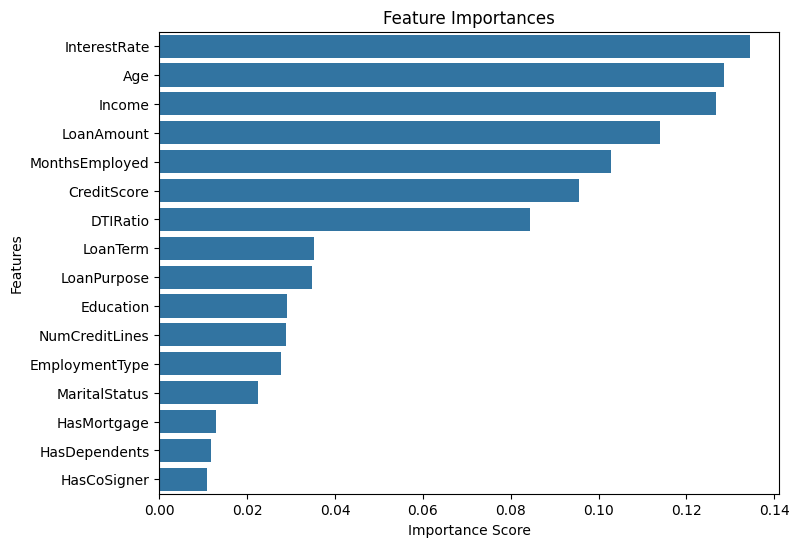

In [34]:
# Get feature importance scores from the trained model
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the top features
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
